# Homework 2
###### by Mher Movsisyan
---

### Problem 1
Why is the number of dummy variables of the regression model always equal to the number of
groups (n) minus 1 (n-1), but not n?  
a. To avoid unsignificant variables  
b. To avoid the situation of perfect multicollinearity  
c. To increase the 𝑅<sup>2</sup> value  
d. To manage other variables in the model  

Answer:  
d

### Problem 2 (10 points)
Consider the following model: 𝐲 = 𝛃<sub>0</sub> + 𝛃<sub>1</sub>𝒙  
When X is a dummy variable, 𝛃<sub>0</sub> + 𝛃<sub>1</sub> can be interpreted as an estimate for …
a. The variance of Y for observations where X=1
b. The variance of Y for observations where X=0
c. The mean of Y for observations where X=1
d. The mean of Y for observations where X=0

Answer:  
c

### Problem 3 (10 points)
How do we interpret a dummy variable coefficient?  
a. The difference between two means  
b. The difference between two coefficients  
c. The difference between two R-square values  
d. None of the above  

Answer:  
b

### Problem 4 (70 points)

Data on 1500 house sales from Stockton, California, are contained in the data file `stockton.csv`.
The houses are detached single-family homes that were listed for sale between October 1, 1996,
and November 30, 1998. The variables are `PRICE` ($), `LIVAREA` (hundreds of square feet), `BEDS`
(number of bedrooms), `BATHS` (number of bathrooms), `LGELOT` ( = 1 if lot size is greater than 0.5
acres, zero otherwise), `AGE` (years), and `POOL` (= 1 if home has pool, zero otherwise).  

a. Examine the histogram of `PRICE`. What do you observe? Create the variable `ln(PRICE)` and
examine its histogram. Comment on the difference. (10 points)

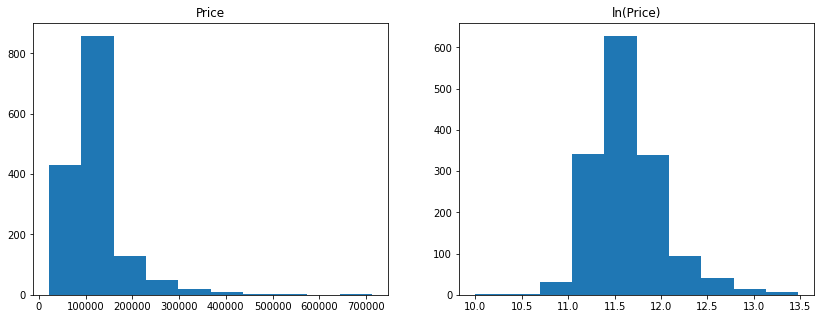

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("stockton.csv")
df["lnprice"] = np.log(df.price)

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14,5))
ax[0].hist(df.price)
ax[1].hist(df.lnprice)
ax[0].set_title("Price")
ax[1].set_title("ln(Price)");

The distribution is less skewed and we can avoid treating some of our observations as outliers.

b. Estimate a regression of `ln(PRICE/1000)` on the remaining variables. Discuss the
estimation results. Comment on the signs and significance of the variables `LIVAREA`,
`BEDS`, `BATHS`, `AGE`, and `POOL`. (10 points)

In [18]:
import statsmodels.api as sm

y = np.log(df.price/1000)
x = sm.add_constant(df[df.columns.difference(["price", "lnprice"])])
model = sm.OLS(y, x)
results = model.fit()

print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.687    
Dependent Variable: price            AIC:                -378.2615
Date:               2022-09-21 19:11 BIC:                -341.0690
No. Observations:   1500             Log-Likelihood:     196.13   
Df Model:           6                F-statistic:        549.6    
Df Residuals:       1493             Prob (F-statistic): 0.00     
R-squared:          0.688            Scale:              0.045288 
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      3.9860     0.0373   106.7462   0.0000    3.9127    4.0592
age       -0.0013     0.0005    -2.8500   0.0044   -0.0022   -0.0004
baths     -0.0103     0.0165    -0.6216   0.5343   -0.0427    0.0221
beds      -0.0382     0.0114    -3.3647   0.0008   -0.0605   -0.0159

Adjusted R<sup>2</sup> tells us that we could explain 66.7% of the variance with this model. The intercept, `livarea`, `age`, `lgelot`, `beds`, and `pool` variables are significant at a = 0.95. The `baths` variable is insignificant at a = 0.95. Out of the significant variables, `age` and `beds` have a negative sign. The sign of the `beds` being negative doesn't match my expectation, there might be strong multicolinearity here.

c. Discuss the effect of large lot size on the selling price of a house. (10 points)

The effect of the `lgelot` variable is significant according to our model. Houses with a large lot size are on average e<sup>0.2531</sup> * 1000 more expensive ($1288). 

d. Introduce to the model an interaction variable `LGELOT*LIVAREA`. Estimate this model and
discuss the interpretation, sign, and significance of the coefficient of the interaction
variable. (10 points)

In [19]:
df["lgelot_livarea"] = df.lgelot * df.livarea
x = sm.add_constant(df[df.columns.difference(["price", "lnprice"])])
model = sm.OLS(y, x)
results = model.fit()

print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.695    
Dependent Variable: price            AIC:                -414.6295
Date:               2022-09-21 19:19 BIC:                -372.1238
No. Observations:   1500             Log-Likelihood:     215.31   
Df Model:           7                F-statistic:        488.5    
Df Residuals:       1492             Prob (F-statistic): 0.00     
R-squared:          0.696            Scale:              0.044174 
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
const              3.9649   0.0370 107.0645 0.0000  3.8923  4.0376
age               -0.0016   0.0005  -3.5269 0.0004 -0.0025 -0.0007
baths             -0.0201   0.0164  -1.2234 0.2214 -0.0522  0.0121
beds              -0.0480   0.0113  -4.2368 0.0000 -0.0702 -0.0258
lgelot       

The new interaction variable `lgelot_livarea` is significant at a = 0.95. The sign of this variable is negative, this means for large lot size houses the `livarea` variable affects the price negatively. For every 100 square feet a large lot house has, the price of the house goes down by e<sup>0.0161</sup> *  1000 ($1016)

e. Test a joint hypothesis of non-significance of `BATHS` and `BEDS` variables. (10 points)

In [20]:
df["baths_beds"] = df.baths * df.beds
x = sm.add_constant(df[df.columns.difference(["price", "lnprice"])])
model = sm.OLS(y, x)
results = model.fit()

print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.698    
Dependent Variable: price            AIC:                -427.5065
Date:               2022-09-21 19:28 BIC:                -379.6875
No. Observations:   1500             Log-Likelihood:     222.75   
Df Model:           8                F-statistic:        433.3    
Df Residuals:       1491             Prob (F-statistic): 0.00     
R-squared:          0.699            Scale:              0.043768 
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               3.5629   0.1106 32.2094 0.0000  3.3459  3.7799
age                -0.0013   0.0005 -2.8773 0.0041 -0.0022 -0.0004
baths               0.1532   0.0478  3.2038 0.0014  0.0594  0.2470
baths_beds         -0.0503   0.0131 -3.8550 0.0001 -0.0759 -0.0247
beds         

The new `baths_beds` variable is significant at a = 0.95. It affects the price negatively

f. Drop `BATHS` from the model and re-estimate the equation. Now, what is the estimated
effect of having a `POOL`? Discuss why the estimate is different than that obtained in part
(b). (10 points)

In [21]:
x = sm.add_constant(df[df.columns.difference(["price", "lnprice", "baths"])])
model = sm.OLS(y, x)
results = model.fit()

print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.696    
Dependent Variable: price            AIC:                -419.2153
Date:               2022-09-21 19:30 BIC:                -376.7095
No. Observations:   1500             Log-Likelihood:     217.61   
Df Model:           7                F-statistic:        490.7    
Df Residuals:       1492             Prob (F-statistic): 0.00     
R-squared:          0.697            Scale:              0.044039 
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               3.8931   0.0403 96.6972 0.0000  3.8142  3.9721
age                -0.0017   0.0004 -3.8189 0.0001 -0.0026 -0.0008
baths_beds         -0.0110   0.0045 -2.4637 0.0139 -0.0198 -0.0022
beds               -0.0211   0.0163 -1.2978 0.1946 -0.0530  0.0108
lgelot       

`pool` affects the price positively. If a house has a pool, it is on average $1090 more expensive. The coefficient is different because it is correlated with a variable (or variables) that we added.

g. Transform the numeric `AGE` variable to the interval variable with 0-10 years, 11-20 years,
21-40 years, and 41+. In regression of point b) replace initial Age variable with this new
`AGE` variable. Interpret the coefficients of the new Age variable. (10 points)

In [34]:
df = pd.read_csv("stockton.csv")
# Reference group
# df["age_0_10"] = (df.age <= 10) + 0
df["age_11_20"] = ((df.age > 10) & (df.age <= 20)) + 0
df["age_21_40"] = ((df.age > 20) & (df.age <= 40)) + 0
df["age_41plus"] = (df.age > 40) + 0

x = sm.add_constant(df[df.columns.difference(["price", "age"])])
model = sm.OLS(y, x)
results = model.fit()

print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.696    
Dependent Variable: price            AIC:                -420.4738
Date:               2022-09-21 19:44 BIC:                -372.6548
No. Observations:   1500             Log-Likelihood:     219.24   
Df Model:           8                F-statistic:        430.4    
Df Residuals:       1491             Prob (F-statistic): 0.00     
R-squared:          0.698            Scale:              0.043973 
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const          4.0387    0.0367  110.1792  0.0000   3.9668   4.1106
age_11_20     -0.1089    0.0149   -7.2935  0.0000  -0.1382  -0.0796
age_21_40     -0.0626    0.0155   -4.0342  0.0001  -0.0930  -0.0321
age_41plus    -0.0932    0.0217   -4.3038  0.0000  -0.1357  -0.0507
baths 

The new variables are all significant with respect to the new reference variable `age_0_10`. They all affect the average price negatively when compared to houses with less than 10 years of age.